In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('Datasets\deptos_en_limpieza.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26205 entries, 0 to 26204
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   26205 non-null  int64  
 1   monto                26205 non-null  int64  
 2   ppm2                 26200 non-null  float64
 3   superficie_t         26205 non-null  float64
 4   superficie_u         25974 non-null  float64
 5   terraza              26205 non-null  float64
 6   dormitorios          25504 non-null  float64
 7   banos                23893 non-null  float64
 8   estacionamiento      26205 non-null  int64  
 9   bodegas              26205 non-null  int64  
 10  cantidad_pisos       16156 non-null  float64
 11  piso                 16110 non-null  float64
 12  tipo_depto           26205 non-null  object 
 13  antiguedad           26205 non-null  int64  
 14  latitud              26205 non-null  float64
 15  longitud             26205 non-null 

In [4]:
df['banos'].unique()

array([ 2.,  4.,  3.,  5., nan,  6.,  1.,  7.,  8., 34.,  9., 20., 33.,
       15., 10., 43., 11.])

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_16796\560703013.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=frecuencia_banos.values, palette='viridis')


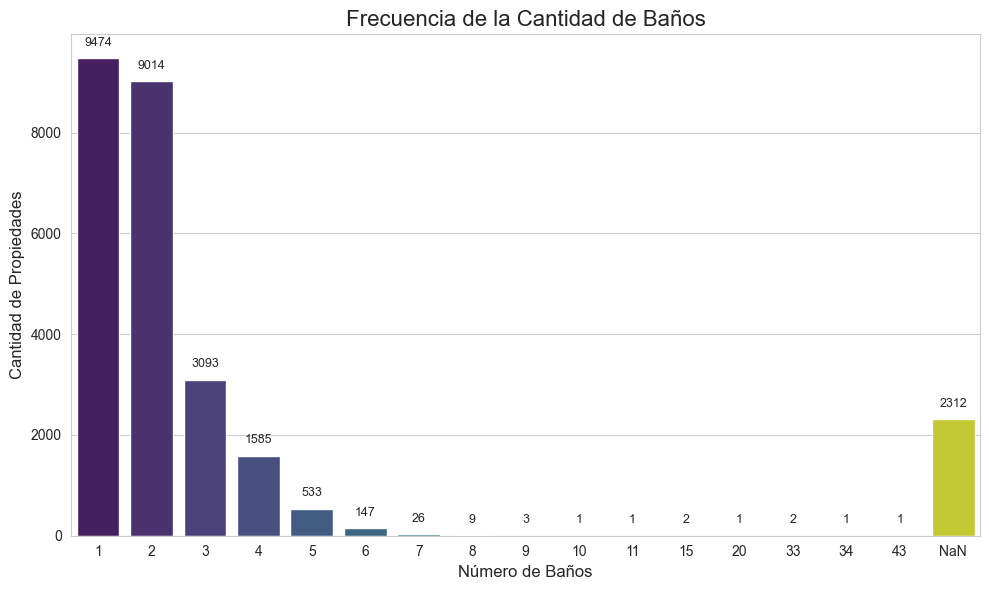

In [5]:
frecuencia_banos = df['banos'].value_counts(dropna=False).sort_index()

# 2. Configurar el estilo del gráfico para una mejor apariencia
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) # Un tamaño estándar es bueno para esta distribución

# 3. Crear el gráfico de barras
# Reemplazamos np.nan con una cadena para que aparezca en el eje X si hay NaNs
x_labels = [str(int(val)) if pd.notna(val) else 'NaN' for val in frecuencia_banos.index]

sns.barplot(x=x_labels, y=frecuencia_banos.values, palette='viridis')

# 4. Añadir títulos y etiquetas
plt.title('Frecuencia de la Cantidad de Baños', fontsize=16)
plt.xlabel('Número de Baños', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)

# 5. Rotar las etiquetas del eje X si fuera necesario (aunque para baños, probablemente no)
# plt.xticks(rotation=45, ha='right')

# 6. Añadir los valores exactos encima de cada barra para mayor claridad (opcional, pero útil)
for index, value in enumerate(frecuencia_banos.values):
    plt.text(index, value + (frecuencia_banos.max() * 0.02), str(value), ha='center', va='bottom', fontsize=9)
    # Ajuste 'value + (frecuencia_banos.max() * 0.02)' para posicionar el texto sobre la barra

# 7. Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [7]:
valores_a_inspeccionar = [9, 15, 20]

# Filtrar el DataFrame para obtener las filas con esos valores de baños
# Usamos .isin() para filtrar por múltiples valores
filas_para_revision = df[df['banos'].isin(valores_a_inspeccionar)]

print(filas_para_revision[['id', 'banos', 'superficie_t', 'dormitorios', 'comuna', 'calle',  'monto']].to_string())

# Mostrar todas las columnas de estas filas:
print("--- Filas para revisión (Baños = 9, 15, o 20) ---")
print(filas_para_revision.to_string()) # .to_string() para mostrar todas las filas y columnas sin truncar


              id  banos  superficie_t  dormitorios      comuna                      calle  monto
3542  1545055655   9.00        702.00         6.00  Las Condes         Camino Piedra Roja  49500
3543  1579217251   9.00        702.00         6.00  Las Condes         Camino Piedra Roja  49500
3545  2857491212   9.00        964.00         6.00  Las Condes         Camino Piedra Roja  49500
3809  2747997634  20.00        700.00        20.00    Vitacura                   Vía Roja  35130
4274  2862660670  15.00        377.00         4.00  Las Condes  Avenida Presidente Riesco  24500
6042  1590207281  15.00        682.50        37.00    Santiago          Diagonal Paraguay  21803
--- Filas para revisión (Baños = 9, 15, o 20) ---
              id  monto   ppm2  superficie_t  superficie_u  terraza  dormitorios  banos  estacionamiento  bodegas  cantidad_pisos  piso    tipo_depto  antiguedad  latitud  longitud      comuna                      calle orientacion_norm  Or_N  Or_S  Or_E  Or_O tipo_depto

In [8]:
valores_banos_a_eliminar = [15, 20]

# Filtrar el DataFrame, manteniendo solo las filas donde 'banos' NO está en la lista de eliminación.
# También aseguramos que los NaN no se filtren en este paso si no es el propósito
df = df[~df['banos'].isin(valores_banos_a_eliminar)].copy()

In [9]:
reemplazos_banos = {
    11: 1,
    33: 3,
    34: 3,
    43: 3
}

# Aplicar los reemplazos a la columna 'banos'
# Usamos .map() para valores específicos, o .replace() con un diccionario
df['banos'] = df['banos'].replace(reemplazos_banos)

In [10]:
df['banos_faltante'] = df['banos'].isna().astype(int)

In [11]:
mediana_banos = df['banos'].median()

# Rellenar los valores NaN en 'banos' con la mediana calculada
df['banos'] = df['banos'].fillna(mediana_banos)

# Redondear los valores a enteros (si hubiera algún flotante residual por la mediana)
df['banos'] = df['banos'].round(0)

# Convertir la columna 'banos' a tipo entero (int)
df['banos'] = df['banos'].astype(int)

In [15]:
df['banos'].unique()

array([ 2,  4,  3,  5,  6,  1,  7,  8,  9, 10])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26202 entries, 0 to 26204
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   26202 non-null  int64  
 1   monto                26202 non-null  int64  
 2   ppm2                 26197 non-null  float64
 3   superficie_t         26202 non-null  float64
 4   superficie_u         25971 non-null  float64
 5   terraza              26202 non-null  float64
 6   dormitorios          25501 non-null  float64
 7   banos                26202 non-null  int32  
 8   estacionamiento      26202 non-null  int64  
 9   bodegas              26202 non-null  int64  
 10  cantidad_pisos       16154 non-null  float64
 11  piso                 16108 non-null  float64
 12  tipo_depto           26202 non-null  object 
 13  antiguedad           26202 non-null  int64  
 14  latitud              26202 non-null  float64
 15  longitud             26202 non-null  floa

### Justificación de las Operaciones en la Columna 'Baños'
La columna banos fue sometida a un proceso de limpieza y preparación de datos diseñado para maximizar su utilidad predictiva, dada su significativa correlación con el precio de los inmuebles. Inicialmente, se identificaron y eliminaron registros con valores atípicos como 15 y 20 baños, que correspondían a propiedades que no encajaban con la definición de un departamento individual (ej. un edificio completo). Esta exclusión asegura que el modelo se entrene solo con datos representativos del universo de interés.

Posteriormente, se realizó una corrección de errores de tecleo para valores como 11, 33, 34 y 43 baños, los cuales, por su rareza extrema y la cercanía de sus dígitos a números plausibles (1 y 3), fueron ajustados a 1 y 3 baños respectivamente. Esta intervención, aunque basada en una inferencia, es un compromiso pragmático para recuperar información de registros potencialmente válidos sin introducir ruido significativo, dada la bajísima frecuencia de estos valores anómalos.

Finalmente, para gestionar los valores faltantes (aproximadamente el 8.8% de los datos), se implementó una estrategia de imputación que prioriza la preservación de datos y la transparencia para el modelo. En lugar de descartar filas completas y perder información valiosa de otras columnas, se optó por imputar los NaN con la mediana de la columna. Crucialmente, se creó una columna indicadora binaria (banos_faltante). Esta flag permite al modelo discernir entre los valores de baños que son reales y los que fueron imputados, aprendiendo si la ausencia de esta información original tiene un impacto propio en el precio del departamento. Este método mitiga el riesgo de sesgos, maximiza el tamaño del conjunto de datos para el entrenamiento del modelo y refleja de manera más precisa la naturaleza de los datos del mundo real.

In [16]:
df.to_csv('Datasets\deptos_en_limpieza.csv', index=False)